In [3]:
import pandas as pd

In [4]:
# Load the dataset
data = pd.read_csv('adult_with_headers.csv')

# 1: Data Exploration and Preprocessing

In [5]:
# Display basic information and the first few rows
data_info = data.info()
head_data = data.head()

data_info, head_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(None,
    age          workclass  fnlwgt   education  education_num  \
 0   39          State-gov   77516   Bachelors             13   
 1   50   Self-emp-not-inc   83311   Bachelors             13   
 2   38            Private  215646     HS-grad              9   
 3   53            Private  234721        11th              7   
 4   28            Private  338409   Bachelors             13   
 
         marital_status          occupation    relationship    race      sex  \
 0        Never-married        Adm-clerical   Not-in-family   White     Male   
 1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
 2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
 3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
 4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
 
    capital_gain  capital_loss  hours_per_week  native_country  income  
 0          2174             0              40

In [6]:
# Check for special characters or inconsistent values
for column in data.select_dtypes(include='object').columns:
    print(f"Unique values in '{column}':\n{data[column].unique()}\n")

Unique values in 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in 'marital_status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values in 'occupation':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Unique values in 'relationship':
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique values in 'race':
[' White' ' Black' ' Asian-Pac-Isl

In [7]:
# Replace '?' with NaN
data.replace(' ?', pd.NA, inplace=True)

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Fill missing values with mode
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native_country'].fillna(data['native_country'].mode()[0], inplace=True)

In [11]:
# Verify missing values are handled
missing_values_after = data.isnull().sum()
missing_values_after

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
# Select numerical columns
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
numerical_cols

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [14]:
# Standard Scaling
standard_scaler = StandardScaler()
standard_scaler

StandardScaler()

In [15]:
standard_scaled_data = standard_scaler.fit_transform(data[numerical_cols])
standard_scaled_data

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [16]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_scaler

MinMaxScaler()

In [17]:
minmax_scaled_data = minmax_scaler.fit_transform(data[numerical_cols])
minmax_scaled_data

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [18]:
# Convert to DataFrame for better visualization
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=numerical_cols)
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=numerical_cols)
standard_scaled_df.head(), minmax_scaled_df.head()

(        age    fnlwgt  education_num  capital_gain  capital_loss  \
 0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
 1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
 2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
 3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
 4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   
 
    hours_per_week  
 0       -0.035429  
 1       -2.222153  
 2       -0.035429  
 3       -0.035429  
 4       -0.035429  ,
         age    fnlwgt  education_num  capital_gain  capital_loss  \
 0  0.301370  0.044302       0.800000       0.02174           0.0   
 1  0.452055  0.048238       0.800000       0.00000           0.0   
 2  0.287671  0.138113       0.533333       0.00000           0.0   
 3  0.493151  0.151068       0.400000       0.00000           0.0   
 4  0.150685  0.221488       0.800000       0.00000           0.0   
 
    hours_per_week  
 0        0.397959  

# 2: Encoding Techniques

In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [20]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include='object').columns.drop('income')
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [21]:
# One-Hot Encoding for columns with <= 5 unique values
onehot_cols = [col for col in categorical_cols if data[col].nunique() <= 5]
onehot_cols

['race', 'sex']

In [22]:
# Label Encoding for columns with > 5 unique values
label_cols = [col for col in categorical_cols if data[col].nunique() > 5]
label_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [23]:
# One-Hot Encoding
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoder

OneHotEncoder(drop='first', sparse_output=False)

In [24]:
onehot_encoded = onehot_encoder.fit_transform(data[onehot_cols])
onehot_encoded

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0.]])

In [25]:
# Label Encoding
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [26]:
for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [27]:
# Convert One-Hot Encoding to DataFrame
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_cols))
onehot_df

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0
32557,0.0,0.0,0.0,1.0,1.0
32558,0.0,0.0,0.0,1.0,0.0
32559,0.0,0.0,0.0,1.0,1.0


In [28]:
# Concatenate with original data
encoded_data = pd.concat([data.drop(onehot_cols, axis=1), onehot_df], axis=1)

encoded_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,6,77516,9,13,4,0,1,2174,0,40,38,<=50K,0.0,0.0,0.0,1.0,1.0
1,50,5,83311,9,13,2,3,0,0,0,13,38,<=50K,0.0,0.0,0.0,1.0,1.0
2,38,3,215646,11,9,0,5,1,0,0,40,38,<=50K,0.0,0.0,0.0,1.0,1.0
3,53,3,234721,1,7,2,5,0,0,0,40,38,<=50K,0.0,1.0,0.0,0.0,1.0
4,28,3,338409,9,13,2,9,5,0,0,40,4,<=50K,0.0,1.0,0.0,0.0,0.0


# 3: Feature Engineering

In [29]:
import numpy as np

In [30]:
# Feature Engineering: Create new features
encoded_data['capital_diff'] = encoded_data['capital_gain'] - encoded_data['capital_loss']
encoded_data['hours_per_week_category'] = pd.cut(encoded_data['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

In [31]:
# Log transformation for skewed feature
encoded_data['log_capital_gain'] = np.log1p(encoded_data['capital_gain'])

encoded_data[['capital_diff', 'hours_per_week_category', 'log_capital_gain']].head()

,capital_diff,hours_per_week_category,log_capital_gain
0,2174,Full-time,7.684784
1,0,Part-time,0.000000
2,0,Full-time,0.000000
3,0,Full-time,0.000000
4,0,Full-time,0.000000


# 4: Feature Selection

In [32]:
from sklearn.ensemble import IsolationForest

In [33]:
# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(encoded_data[numerical_cols])

In [34]:
# Filter out the outliers
cleaned_data = encoded_data[outliers == 1]

cleaned_data.shape, encoded_data.shape

((32235, 21), (32561, 21))

In [35]:
# Selecting only numerical columns for correlation matrix
numeric_data = cleaned_data.select_dtypes(include=['float64', 'int64'])

In [36]:
# Correlation Matrix
correlation_matrix = numeric_data.corr()
correlation_matrix

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,capital_diff,log_capital_gain
age,1.000000,0.036897,-0.077302,-0.010313,0.031440,-0.270851,-0.000452,-0.263144,0.108184,0.040729,0.071138,-0.000163,-0.010481,-0.018202,-0.034870,0.031959,0.087473,0.100213,0.113960
workclass,0.036897,1.000000,-0.025542,0.003706,-0.000623,-0.020178,0.006037,-0.056992,0.016060,-0.003787,0.041652,-0.001679,0.010578,-0.064474,-0.010565,0.056249,0.070067,0.016331,0.006170
fnlwgt,-0.077302,-0.025542,1.000000,-0.028766,-0.043846,0.028712,-0.000367,0.009003,-0.008207,-0.013248,-0.021618,-0.063765,-0.051204,0.118450,0.007002,-0.057456,0.026780,-0.006100,-0.006445
education,-0.010313,0.003706,-0.028766,1.000000,0.357776,-0.037835,-0.042084,-0.009715,0.029125,0.019229,0.054525,0.076178,0.010061,-0.021619,-0.029559,0.022335,-0.028782,0.025757,0.019859
education_num,0.031440,-0.000623,-0.043846,0.357776,1.000000,-0.066341,0.069265,-0.091079,0.141995,0.078918,0.144119,0.088887,0.062237,-0.073536,-0.045824,0.050335,0.009120,0.127768,0.109553
marital_status,-0.270851,-0.020178,0.028712,-0.037835,-0.066341,1.000000,0.035127,0.185308,-0.059034,-0.035210,-0.190472,-0.020817,0.018528,0.080442,0.017101,-0.079932,-0.128313,-0.052764,-0.062939
occupation,-0.000452,0.006037,-0.000367,-0.042084,0.069265,0.035127,1.000000,-0.036312,0.005791,0.008038,-0.015307,-0.001800,0.006906,-0.001841,0.007569,-0.004468,0.046615,0.004498,0.004944
relationship,-0.263144,-0.056992,0.009003,-0.009715,-0.091079,0.185308,-0.036312,1.000000,-0.068473,-0.060234,-0.248552,-0.010583,0.010828,0.137473,0.016724,-0.131420,-0.581198,-0.058333,-0.075924
capital_gain,0.108184,0.016060,-0.008207,0.029125,0.141995,-0.059034,0.005791,-0.068473,1.000000,-0.047679,0.082815,0.011931,-0.003919,-0.025124,-0.013675,0.025932,0.059372,0.989034,0.829529
capital_loss,0.040729,-0.003787,-0.013248,0.019229,0.078918,-0.035210,0.008038,-0.060234,-0.047679,1.000000,0.045678,0.010540,0.005734,-0.019210,-0.006288,0.018082,0.045627,-0.194679,-0.060646


In [37]:
# Display correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

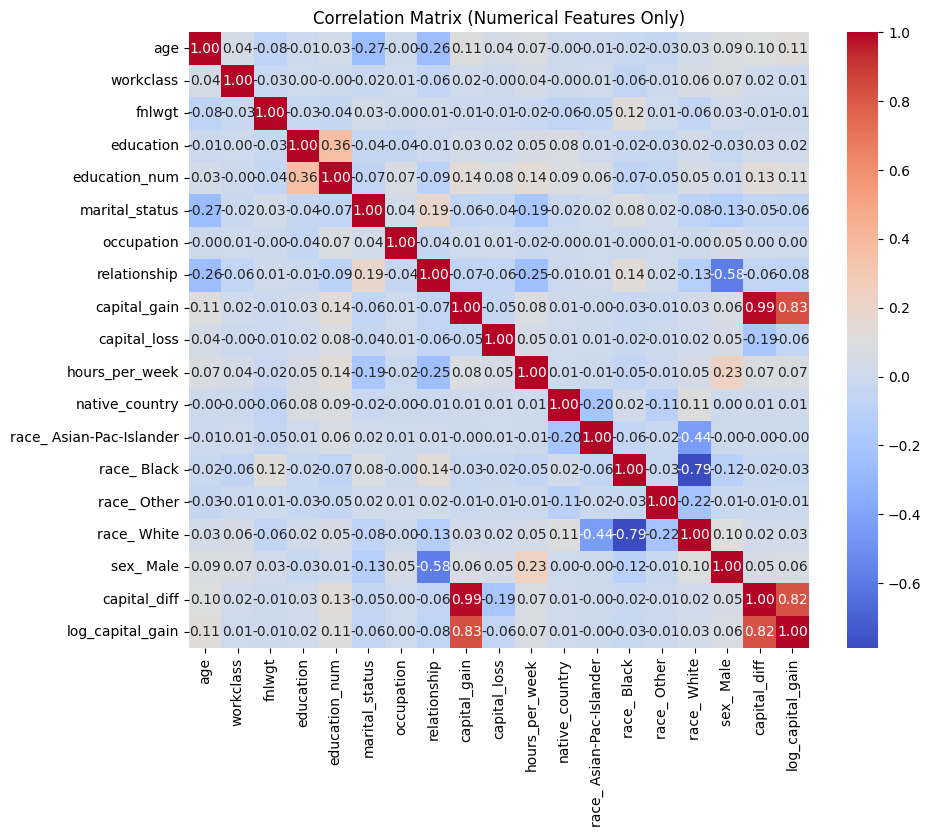

In [38]:
# Display correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

In [1]:
# Install ppscore if not already installed
!pip install ppscore

In [2]:
import ppscore as pps

In [39]:
# Compute Predictive Power Score (PPS) matrix
pps_matrix = pps.matrix(data)[['x', 'y', 'ppscore']]
pps_matrix

,x,y,ppscore
0,age,age,1.0
1,age,workclass,0.0
2,age,fnlwgt,0.0
3,age,education,0.0
4,age,education_num,0.0
...,...,...,...
220,income,capital_gain,0.0
221,income,capital_loss,0.0
222,income,hours_per_week,0.0
223,income,native_country,0.0


In [40]:
# Reshape for better visualization
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')
pps_pivot

y,age,capital_gain,capital_loss,education,education_num,fnlwgt,hours_per_week,income,marital_status,native_country,occupation,race,relationship,sex,workclass
x,,,,,,,,,,,,,,,
age,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.005415,0.169528,0.0,0.001871,1.747134e-07,0.000829,0.000000,0.0
capital_gain,0.003296,1.0,0.0,0.0,0.012555,0.0,0.0,0.297123,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
capital_loss,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.141755,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
education,0.016926,0.0,0.0,1.0,1.000000,0.0,0.0,0.243135,0.000000,0.0,0.024328,1.747134e-07,0.000000,0.000000,0.0
education_num,0.016926,0.0,0.0,1.0,1.000000,0.0,0.0,0.243135,0.000000,0.0,0.024328,1.747134e-07,0.000000,0.000000,0.0
fnlwgt,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.090438,0.0
hours_per_week,0.002377,0.0,0.0,0.0,0.000000,0.0,1.0,0.047278,0.000000,0.0,0.003146,4.591198e-03,0.000000,0.139400,0.0
income,0.034161,0.0,0.0,0.0,0.028055,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.747134e-07,0.000000,0.000000,0.0
marital_status,0.201582,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.747134e-07,0.132852,0.312799,0.0


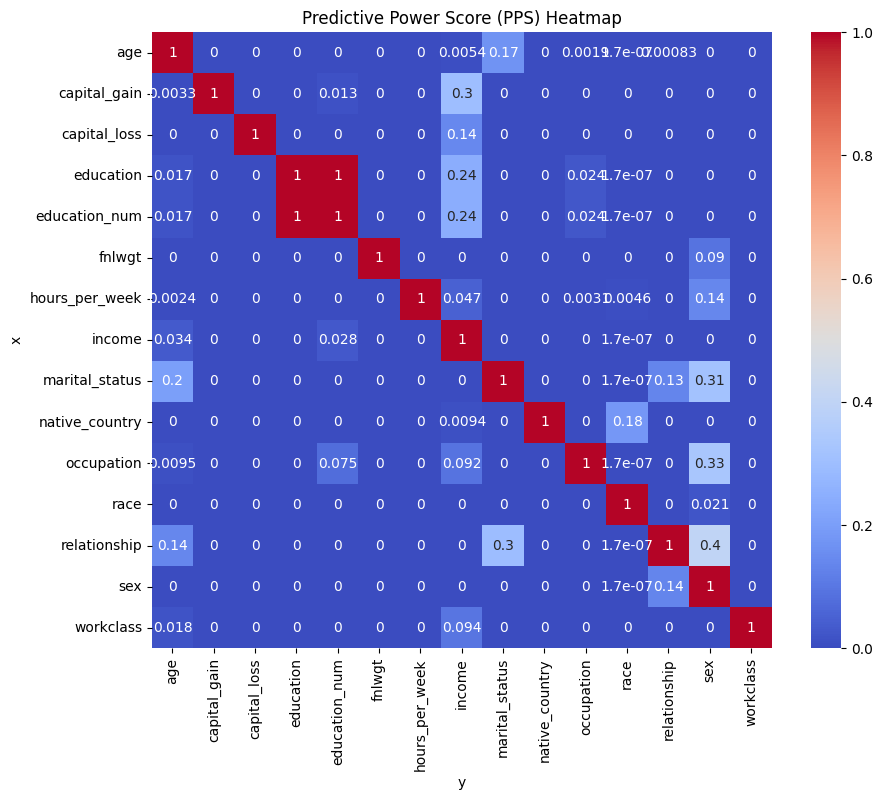

In [41]:
# Plot the PPS heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pps_pivot, cmap='coolwarm', annot=True)
plt.title('Predictive Power Score (PPS) Heatmap')
plt.show()

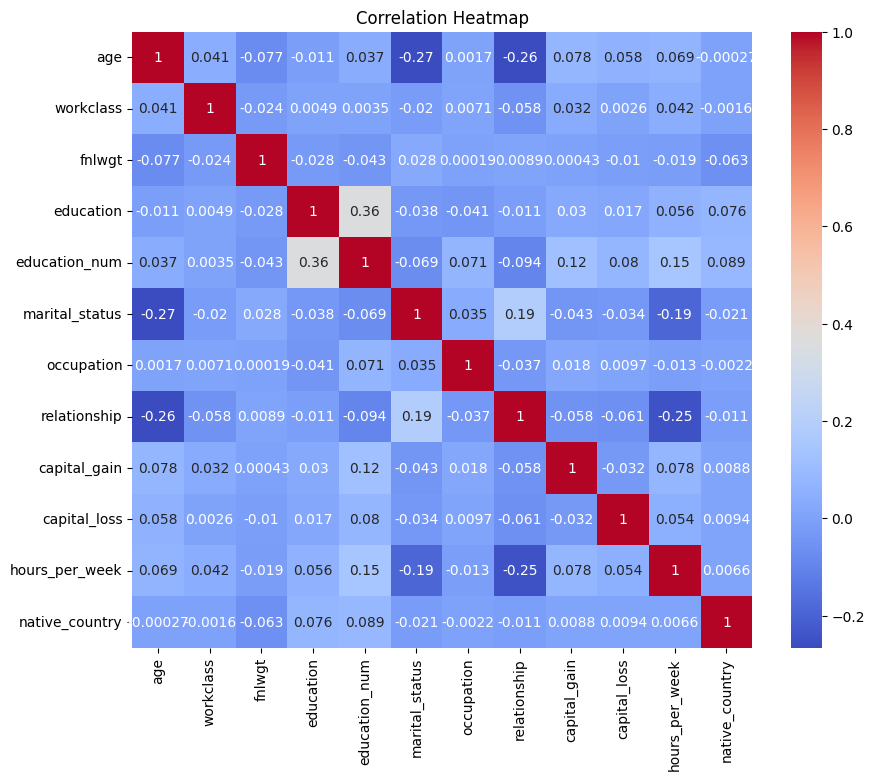

In [42]:
# Compare with traditional correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()